In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

load data

In [3]:
df = pd.read_csv('Gowalla_totalCheckins.txt', sep='\t', header=None)
checkins = df[[0, 4]]
checkins.columns = ['userId', 'placeId']
    
clasters = pd.read_csv('answer.txt', sep='\n', header=None, names=['clasterId'])
clasters["userId"] = pd.Series(range(196591))

df = pd.merge(checkins, clasters,  how='inner', left_on=['userId'], right_on = ['userId'])
users = np.unique(checkins['userId'].values)


In [4]:
users_train, users_test = train_test_split(users, test_size=0.5, random_state=42)
data_test = df[np.in1d(df['userId'], users_test)]

data_train = df[np.in1d(df['userId'], users_train)]

count of clusters

In [5]:
np.unique(clasters['clasterId'].values).shape[0]

53510

get top 10

In [6]:
top10 = df.groupby('clasterId').apply(lambda x: x['placeId'].value_counts().nlargest(10).index.values)


acc

In [7]:
positiveAnsw = 0
allAnsw = 0

for user in users_test:
    top_places = top10.loc[clasters.loc[user]['clasterId']]
    users_places = data_test[data_test['userId'] == user]['placeId']
    
    answIsTrue = np.isin(top_places, users_places)
    
    allAnsw = allAnsw + top_places.shape[0]
    positiveAnsw = positiveAnsw + answIsTrue[answIsTrue].shape[0]

positiveAnsw / allAnsw * 100

28.729777827883048

In [62]:
clastersSize = clasters['clasterId'].value_counts()
clastersSize[clastersSize == 1].shape[0]

29175

In [70]:
cl_size = np.zeros(196591)

for i in clasters['clasterId']:
    cl_size[int(i)] +=1
    
print (cl_size)
    

[608. 757. 938. ...   0.   0.   1.]


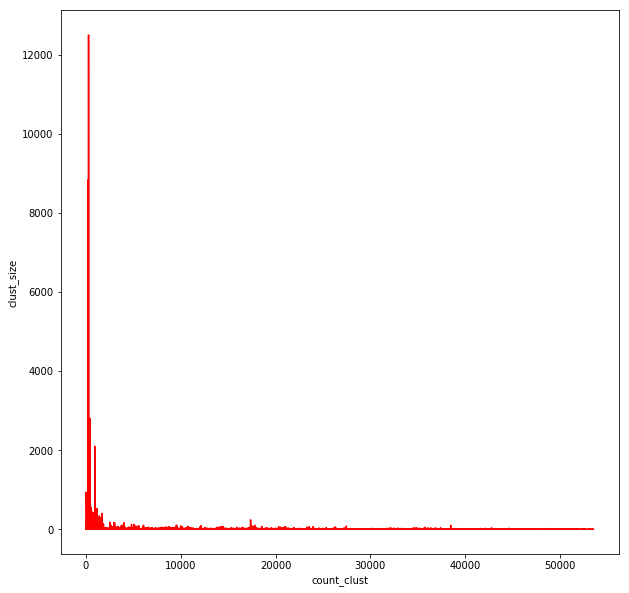

In [72]:
import matplotlib.pyplot as plt

cl_size = cl_size[cl_size != 0]

plt.figure(figsize =(10,10))
plt.plot(range(len(cl_size)), cl_size, color = 'red')
plt.ylabel('clust_size')
plt.xlabel('count_clust')
plt.show()
